<a href="https://colab.research.google.com/github/vitroid/snakeskin/blob/main/snakeskin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [183]:
from PIL import Image
import random
from icecream import ic
import matplotlib.pyplot as plt
import numpy as np


def make_skin(L: int = 64) -> np.ndarray:
    centers = [(x, y) for x in range(0, L, L // 4) for y in range(0, L, L // 4)]

    skin = np.zeros([L, L])

    queue = []
    for center in centers:
        skin[center] = 1
        queue.append(center)

    # for _ in range(40000):
    while len(queue):
        i = random.choice(range(len(queue)))
        point = queue.pop(i)
        depth = skin[point]
        assert depth > 0
        x, y = point
        for a in (-1, 0, 1):
            for b in (-1, 0, 1):
                if a + b == 0:
                    continue
                xx = (x + a + L) % L
                yy = (y + b + L) % L
                if skin[xx, yy] == 0:
                    skin[xx, yy] = depth + 1
                    queue.append((xx, yy))
    return skin


def bigmap(skin: np.ndarray) -> np.ndarray:
    h, w = skin.shape
    dskin = mirror(skin)
    bigskin = np.zeros([h * 2, w * 2])
    bigskin[0:h, 0:w] = dskin
    bigskin[h : 2 * h, w : 2 * w] = dskin
    bigskin[0:h, w : 2 * w] = skin
    bigskin[h : 2 * h, :w] = skin.T
    return bigskin


def mirror(skin: np.ndarray) -> np.ndarray:
    return np.triu(skin) + np.triu(skin, k=1).T


def paint(skin: np.ndarray) -> Image:
    dmax = np.max(skin)
    skin = ((skin + dmax * 2 // 4) % dmax) / dmax
    cmap = plt.get_cmap("YlGnBu")
    return Image.fromarray(cmap(skin, bytes=True))


def make_tiles(img: Image, scale: int) -> Image:
    width, height = img.size
    a = np.asarray(
        img.resize([width * scale, height * scale], resample=Image.NEAREST)
    ).copy()
    # add lines
    a[::scale] = 0
    a[:, ::scale] = 0
    return Image.fromarray(a)


def rotate45(img: Image) -> Image:
    width, height = img.size
    img = img.rotate(-45)
    # rot = crop_center(img.rotate(-45)).resize([L * 5, L * 7], resample=Image.LANCZOS)
    a = np.asarray(img).copy()
    return Image.fromarray(
        a[width // 7 : width * 6 // 7, height // 7 : height * 6 // 7]
    )

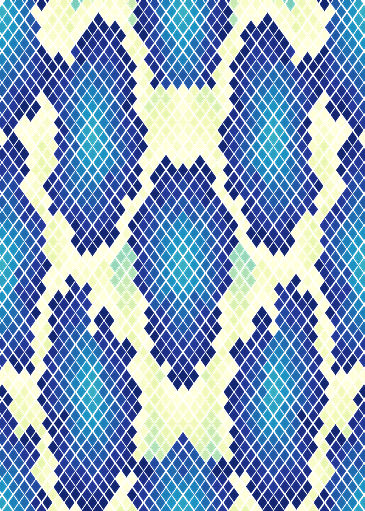

In [ ]:
skin = make_skin(L=64)
skin = mirror(skin)
# or
# skin = bigmap(skin)
img = paint(skin)
img = make_tiles(img, scale=8)
img = rotate45(img)
width, height = img.size
img = img.resize([width, height * 7 // 5], resample=Image.LANCZOS)

img.save("python.png")
img